In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.linalg
import scipy

print(np.__version__)
print(matplotlib.__version__)
print(scipy.__version__)

1.26.0
3.8.0
1.11.2


In [2]:
def normVector(v):
    return np.linalg.norm(v)

def __calcResidual(A, f, X):
    r = np.matrix(np.zeros((n + 1, 1)))
    r = A * X - f
    
    return r

def calcResidual(A, f, X):
    return normVector(__calcResidual(A, f, X))

In [3]:
def makePlot(y, title):
    plt.figure(figsize=(20, 10))

    x = np.arange(len(y))
    plt.plot(x, y, 'o--')
    plt.xlabel(r'$ iteration $', fontsize=16)
    plt.ylabel(r'$ ||r|| $', fontsize=16)

    #plt.yscale("log")

    plt.title(title, fontsize=16)
    plt.grid()
    #plt.legend(fontsize=16)
    plt.show()

## Non-linear equation
Chosen equation №1 from IV.12.4:

2x^2 + 5x -3 = 0

### Simple iteration method

In [4]:
def equation_sim(phi, x0, accuracy):
    rs = list()
    x = x0

    while True:
        prev_x = x
        x = phi(x)

        rs.append(abs(prev_x - x))
        if rs[-1] < accuracy:
            break

    return x, rs

In [5]:
x, rs = equation_sim(lambda x: 1/5 * (-2*(x**2) + 3), 0, 1e-8)
x

0.5000000011699167

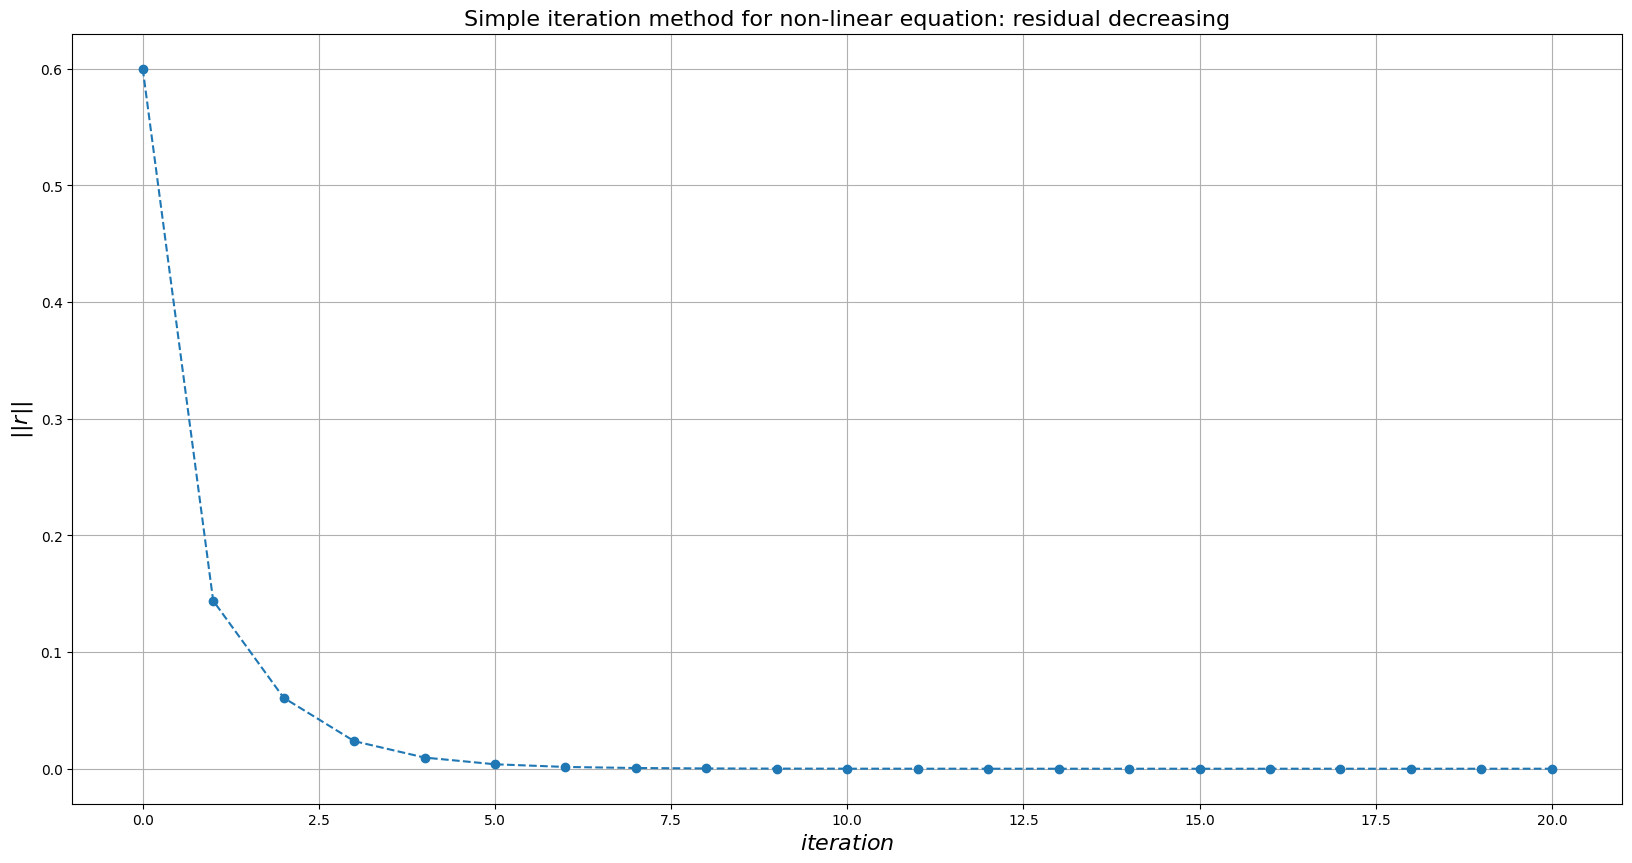

In [6]:
makePlot(rs, "Simple iteration method for non-linear equation: residual decreasing")

### Newton method

In [7]:
def equation_newton(f, x0, accuracy):
    def der3(f, x, h=1e-5):
        return (f(x + h) - f(x - h)) / (2*h)
    
    rs = list()
    x = x0

    while True:
        prev_x = x
        x = x - f(x)/der3(f, x)

        rs.append(abs(prev_x - x))
        if rs[-1] < accuracy:
            break

    return x, rs

In [8]:
x, rs = equation_newton( lambda x: 2*(x**2) + 5*x - 3, 0, 1e-6)
x

0.5

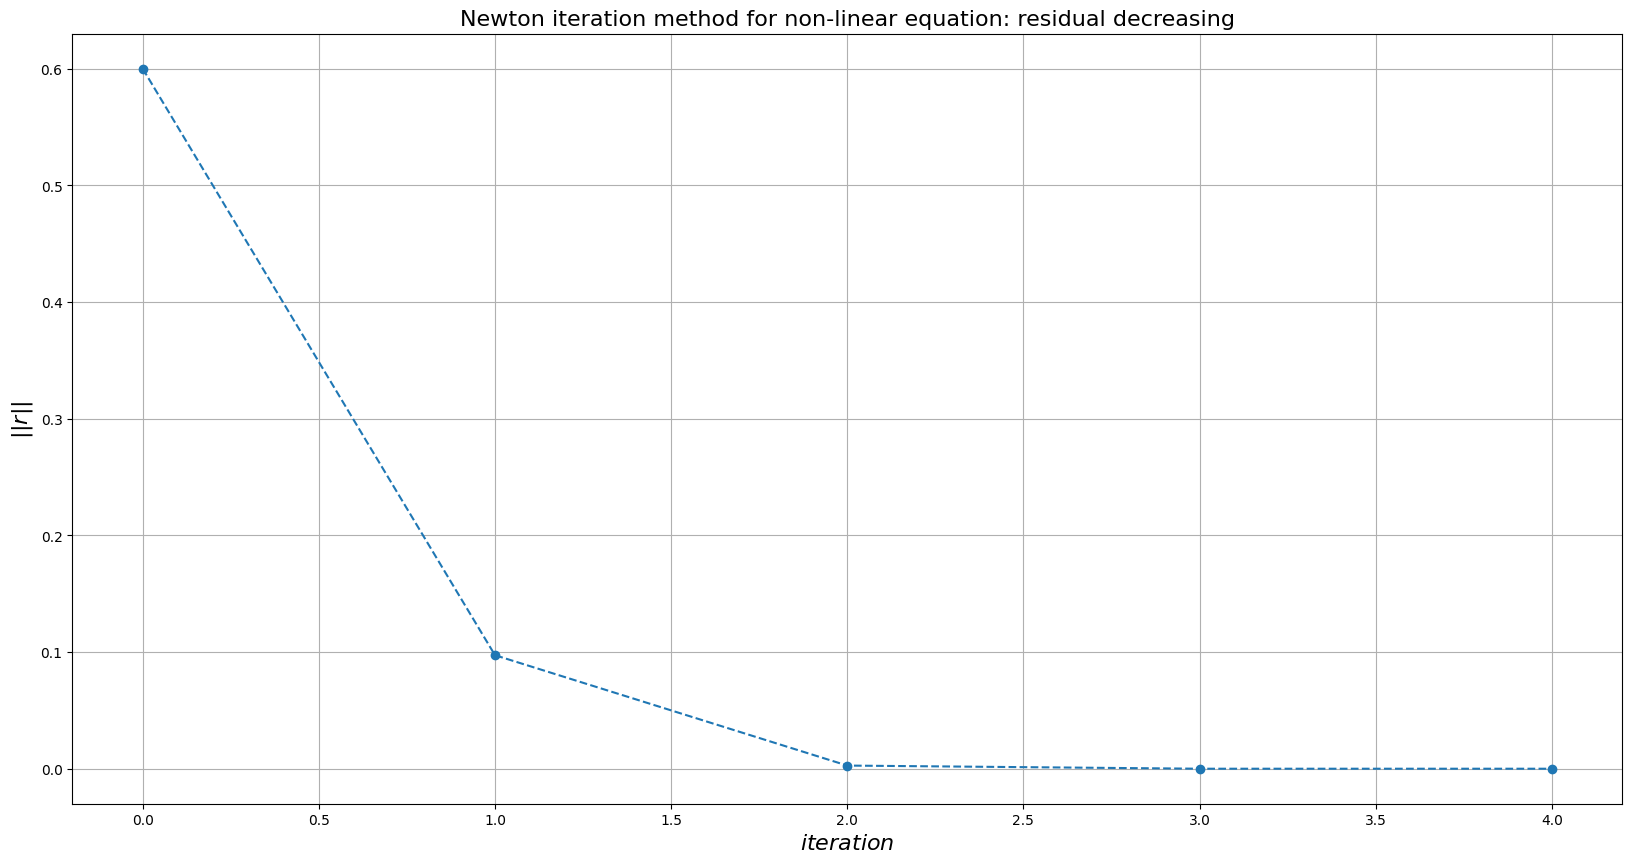

In [9]:
makePlot(rs, "Newton iteration method for non-linear equation: residual decreasing")

## Non-linear system

In [10]:
def system_sim(Phi, X0, accuracy):
    #X0 = np.matrix(X0)

    rs = list()
    X = np.matrix(X0)

    while True:
        prev_X = np.matrix(X)
        X = Phi(X)

        rs.append(normVector(prev_X - X))
        if rs[-1] < accuracy:
            break

    return X, rs

In [11]:
def usr_Phi(X):
    x, y = X[0, 0], X[1, 0]
    x, y = 1 - np.cos(y)/2, np.sin(x + 1) - 12

    return np.matrix([[x], [y]])

X0 = np.matrix(np.zeros((2, 1)))
X, rs = system_sim(usr_Phi, X0, 1e-8)
X

matrix([[  0.96036521],
        [-11.07492712]])

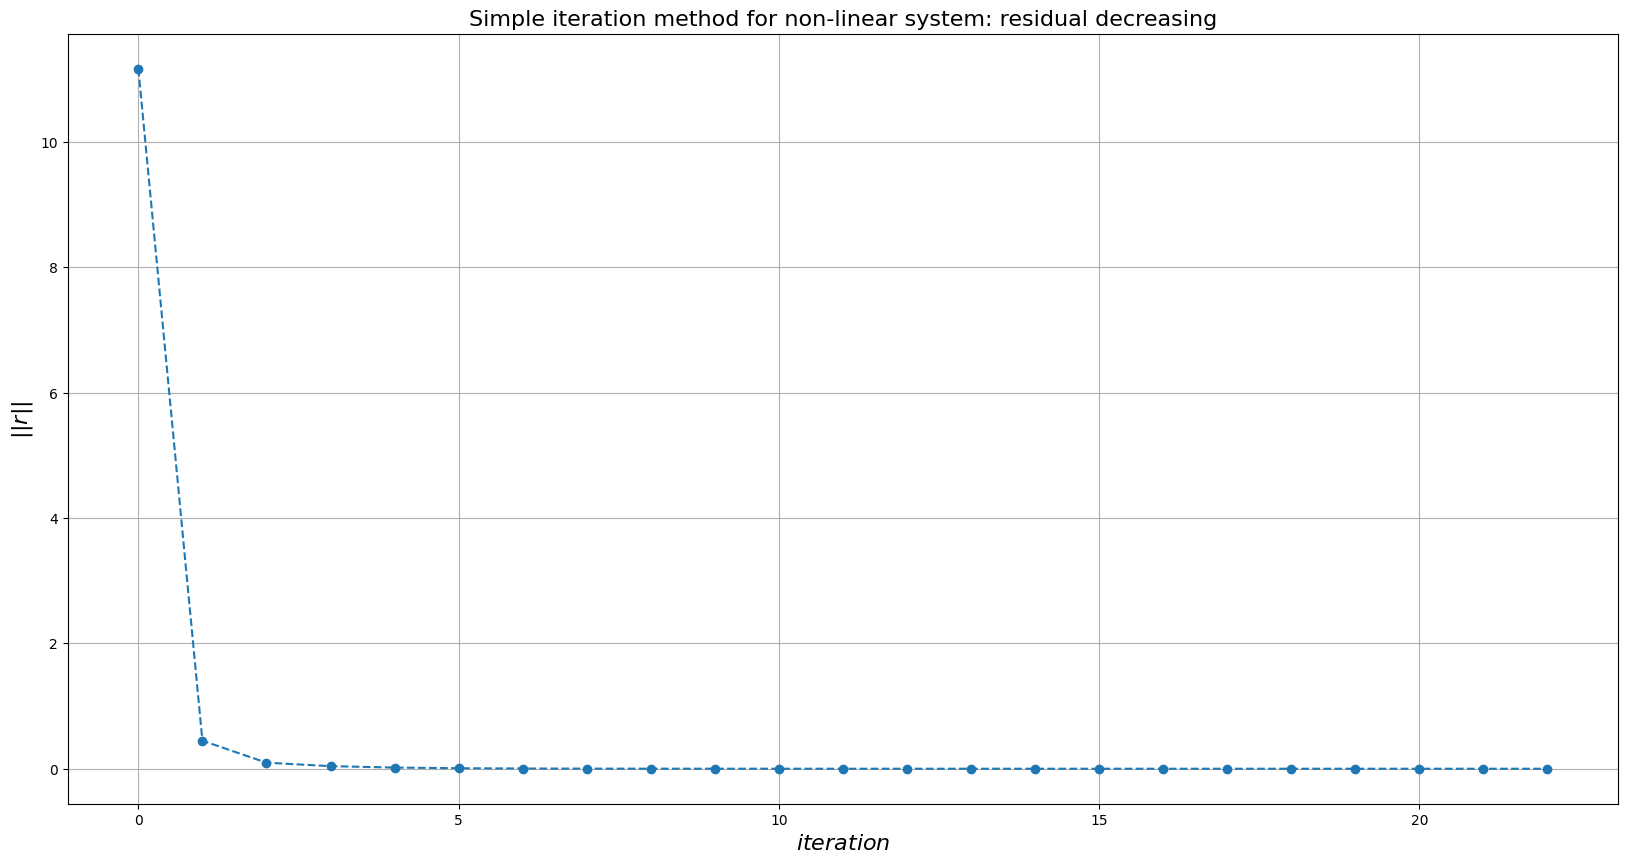

In [13]:
makePlot(rs, "Simple iteration method for non-linear system: residual decreasing")

### Newton method

In [28]:
def system_newton(F, X0, accuracy):
    def J(F, X, h=1e-5):
        n = X.shape[0]

        J = np.matrix(np.zeros((n, n)))
        #i, j = np.indices(J.shape)
        #J[i, j] = F() 
        #(f(x + h) - f(x)) / h
        for i in range(n):
            for j in range(n):
                H = np.matrix(np.zeros((n, 1)))
                H[j, 0] = h

                J[i, j] = (F(X + H)[i, 0] - F(X)[i, 0])/h

        return J

    X = np.matrix(X0)
    rs = list()

    while True:
        prev_X = X
        X = X - np.linalg.inv(J(F, X)) * F(X)

        rs.append(normVector(prev_X - X))
        if rs[-1] < accuracy:
            break

    return X, rs

In [30]:
def usr_F(X):
    x, y = X[0, 0], X[1, 0]
    return np.matrix([[np.sin(x + 1) - y - 12], [np.cos(y) + 2 * x - 2]])

X0 = np.matrix(np.zeros((2, 1)))
X, rs = system_newton(usr_F, X0, 1e-8)
X

matrix([[  0.96036521],
        [-11.07492712]])

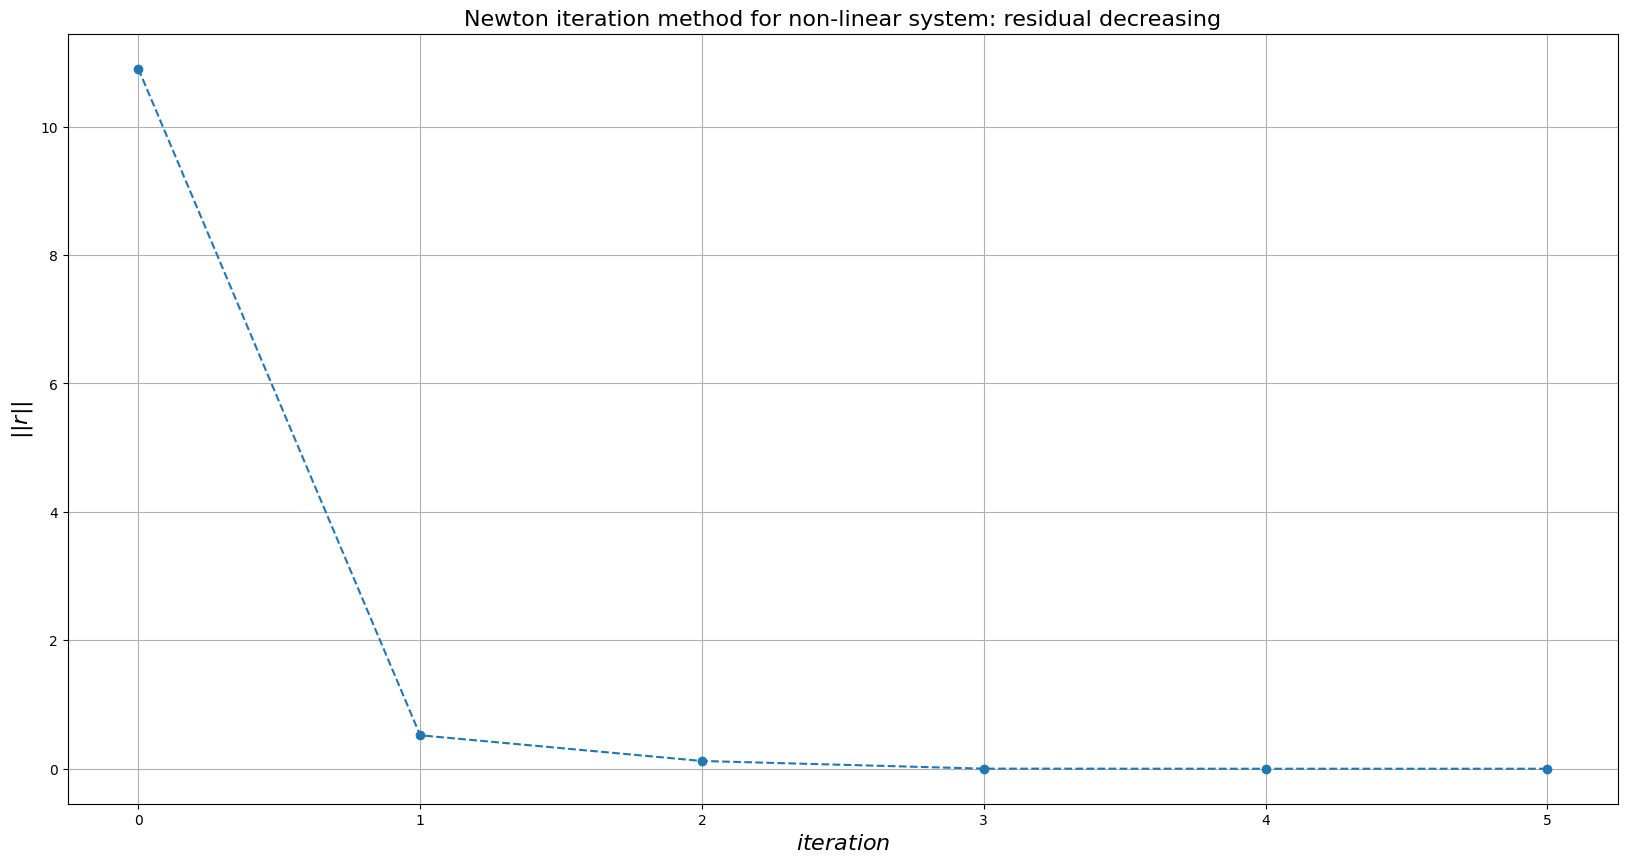

In [31]:
makePlot(rs, "Newton iteration method for non-linear system: residual decreasing")